<a href="https://colab.research.google.com/github/fanxu30/XAI/blob/main/assn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03
## Fan Xu
 🩺 Case 2: Tumor Misclassification – Breast Cancer Dataset
 🟦 Defense

In [ ]:
# 🧬 Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import subprocess

from lime.lime_tabular import LimeTabularExplainer
import shap


# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc["target"] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 🧬 Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame(
    [
        {
            "mean radius": 13.80,
            "mean texture": 15.79,
            "mean perimeter": 90.43,
            "mean area": 584.1,
            "mean smoothness": 0.1007,
            "mean compactness": 0.1280,
            "mean concavity": 0.07789,
            "mean concave points": 0.05069,
            "mean symmetry": 0.1662,
            "mean fractal dimension": 0.06566,
            "radius error": 0.4101,
            "texture error": 1.074,
            "perimeter error": 2.635,
            "area error": 40.14,
            "smoothness error": 0.00541,
            "compactness error": 0.02204,
            "concavity error": 0.01664,
            "concave points error": 0.01185,
            "symmetry error": 0.02095,
            "fractal dimension error": 0.004902,
            "worst radius": 16.57,
            "worst texture": 20.86,
            "worst perimeter": 110.3,
            "worst area": 812.4,
            "worst smoothness": 0.1411,
            "worst compactness": 0.3542,
            "worst concavity": 0.2779,
            "worst concave points": 0.1383,
            "worst symmetry": 0.2589,
            "worst fractal dimension": 0.1030,
        }
    ]
)

# Run prediction
pred = model_bc.predict(focus_instance_bc)
print(
    "Prediction for Patient X:",
    "Benign → No Biopsy" if pred[0] == 1 else "Malignant → Action Needed",
)

Prediction for Patient X: Benign → No Biopsy


In [ ]:
# Data Structure
print("Data Structure:")
print("-------------------")
print("Dimensions: ", df_bc.shape)
print(f"Data Types: \n{df_bc.dtypes}")
print(f"Missing Values: \n{df_bc.isnull().sum()}")

Data Structure:
-------------------
Dimensions:  (569, 31)
Data Types: 
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity   

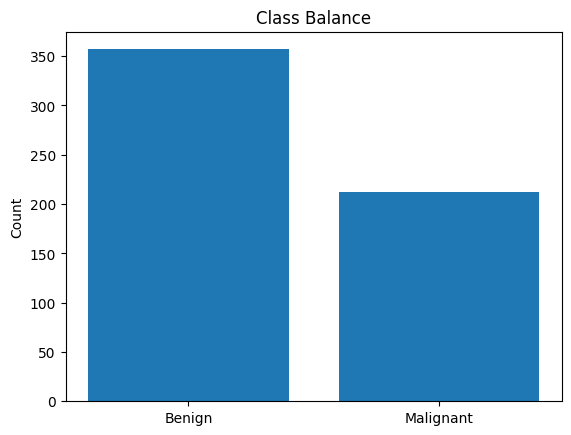

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# 📈 EDA: Class balance
class_names = {0: "Malignant", 1: "Benign"}
class_counts = y.value_counts().rename(index=class_names)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts.values)
ax.set_title("Class Balance")
ax.set_ylabel("Count")
plt.show()

# Quick stats
df_bc.describe()

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


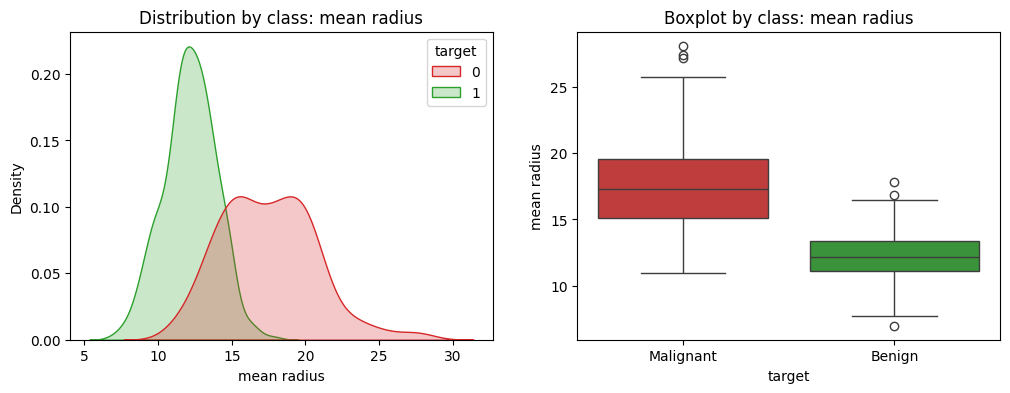

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


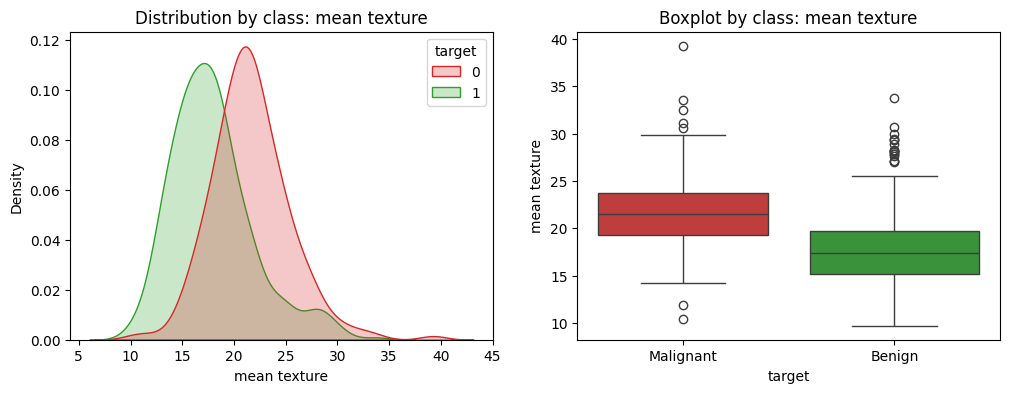

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


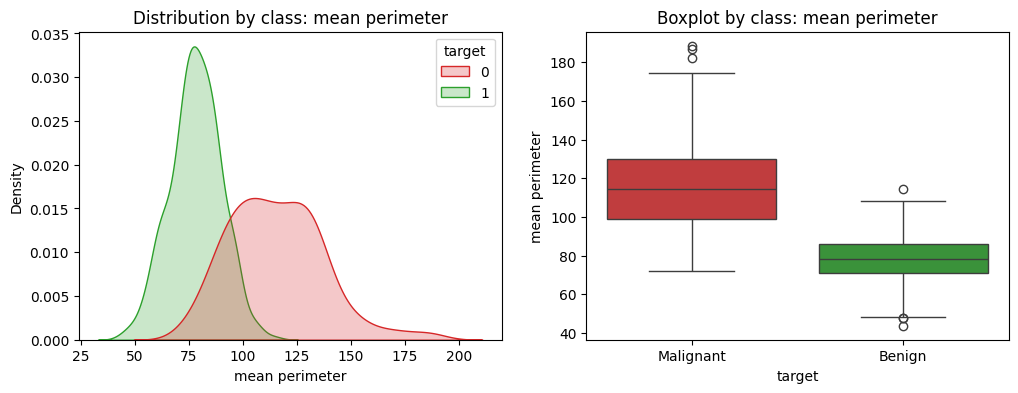

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


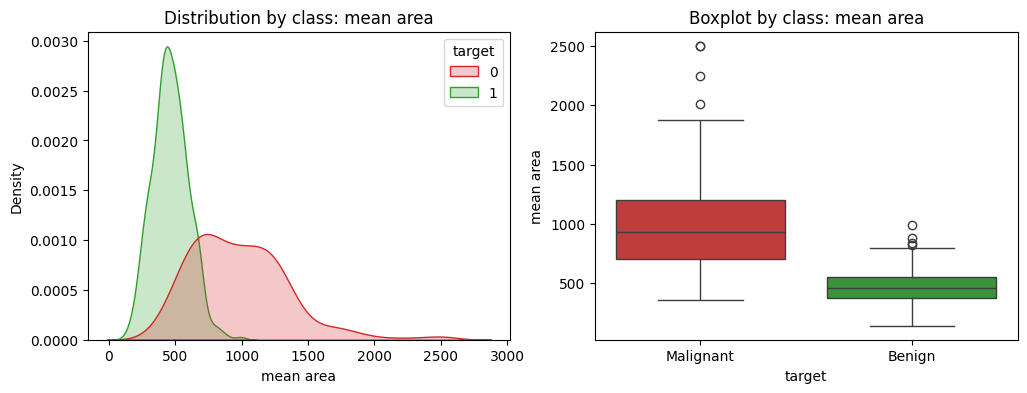

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


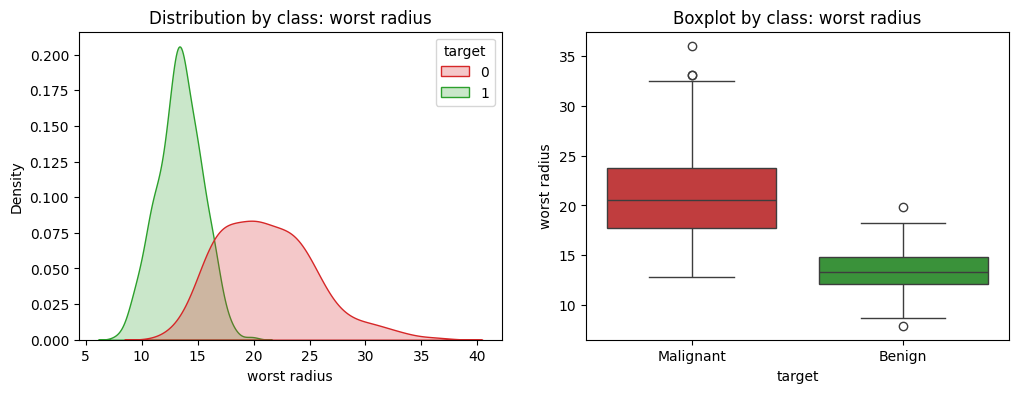

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_32150/1775863716.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Malignant", "Benign"])


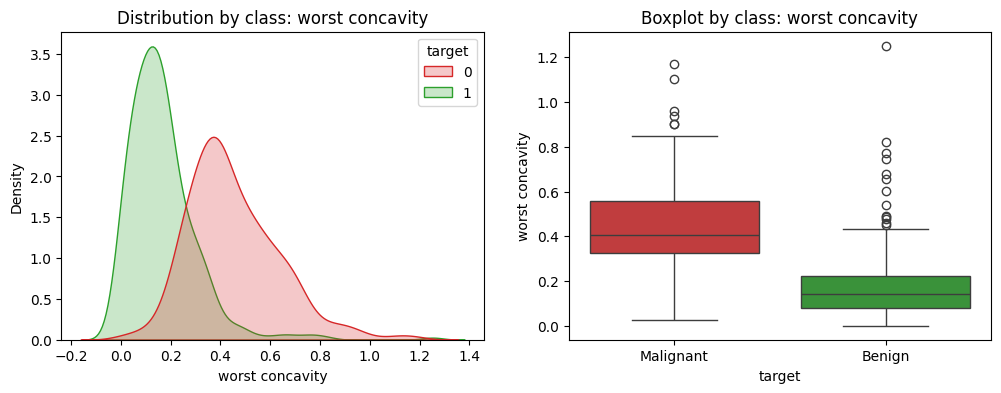

In [ ]:
# EDA: Feature distributions
selected_features = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "worst radius",
    "worst concavity",
]

for feat in selected_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.kdeplot(
        data=df_bc,
        x=feat,
        hue="target",
        ax=ax[0],
        fill=True,
        common_norm=False,
        palette={"0": "#d62728", "1": "#2ca02c", 0: "#d62728", 1: "#2ca02c"},
    )
    ax[0].set_title(f"Distribution by class: {feat}")

    sns.boxplot(
        data=df_bc,
        x="target",
        y=feat,
        ax=ax[1],
        palette={"0": "#d62728", "1": "#2ca02c", 0: "#d62728", 1: "#2ca02c"},
    )
    ax[1].set_title(f"Boxplot by class: {feat}")
    ax[1].set_xticklabels(["Malignant", "Benign"])
    plt.show()

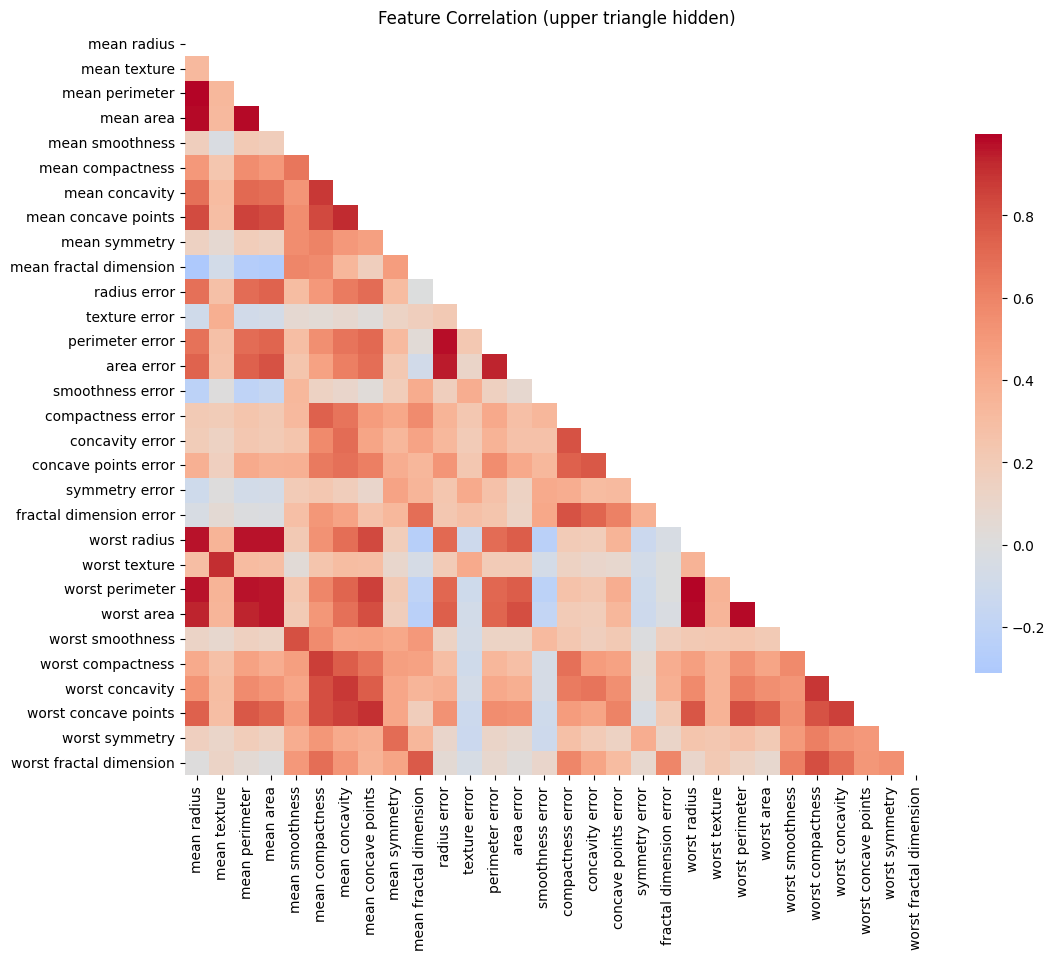

In [ ]:
# EDA: Correlation heatmap
corr = df_bc.drop(columns=["target"]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr, mask=mask, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": 0.7}
)
plt.title("Feature Correlation")
plt.show()

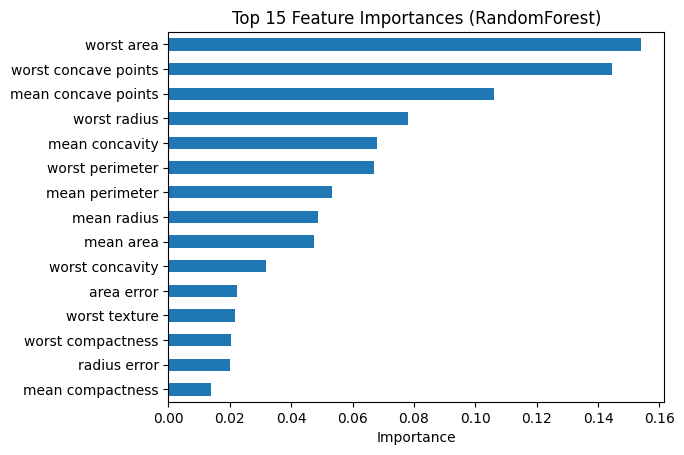

In [ ]:
# RandomForest: Feature importance
importances = pd.Series(model_bc.feature_importances_, index=X.columns).sort_values(
    ascending=False
)
ax = importances.head(15).plot(kind="barh", color="#1f77b4")
ax.invert_yaxis()
ax.set_title("Top 15 Features by Importance")
ax.set_xlabel("Importance")
plt.show()

In [ ]:
# SHAP analysis global and local explanations (robust to bias column)

# TreeExplainer for tree models
explainer = shap.TreeExplainer(model_bc)
# background sample for speed
X_background = shap.sample(X_train, 200, random_state=42)
shap_values = explainer.shap_values(X_background)

# Handle potential extra bias column present in some SHAP versions
sv_global = shap_values[1]
if hasattr(sv_global, "shape") and sv_global.shape[1] == X_background.shape[1] + 1:
    sv_global = sv_global[:, :-1]

# Summary plot (global feature impact)
shap.summary_plot(sv_global, X_background, feature_names=X.columns)
plt.title("SHAP Summary Plot (class=Benign)")
plt.show()

# Bar summary for magnitude
shap.summary_plot(sv_global, X_background, feature_names=X.columns, plot_type="bar")
plt.title("SHAP Feature Importance (bar, class=Benign)")
plt.show()

# Local explanation for the focus instance
focus_sv_all = explainer.shap_values(focus_instance_bc)
sv_focus = focus_sv_all[1]
if hasattr(sv_focus, "shape") and sv_focus.shape[1] == focus_instance_bc.shape[1] + 1:
    sv_focus = sv_focus[:, :-1]

shap.force_plot(
    explainer.expected_value[1], sv_focus[0], focus_instance_bc, matplotlib=True
)
plt.title("SHAP Force Plot: Focus Instance (class=Benign)")
plt.show()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

/Users/fanxu/xai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


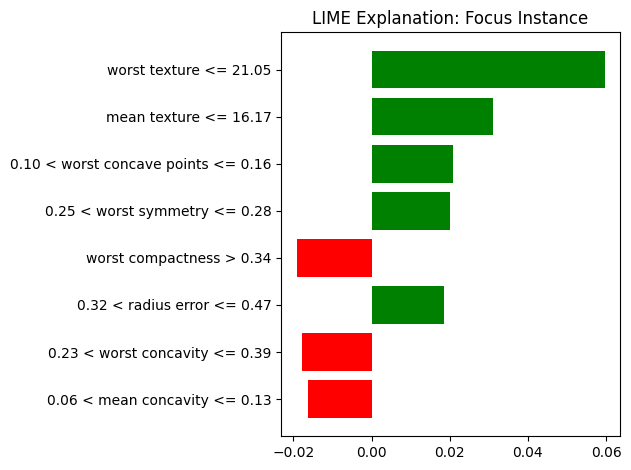

/Users/fanxu/xai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


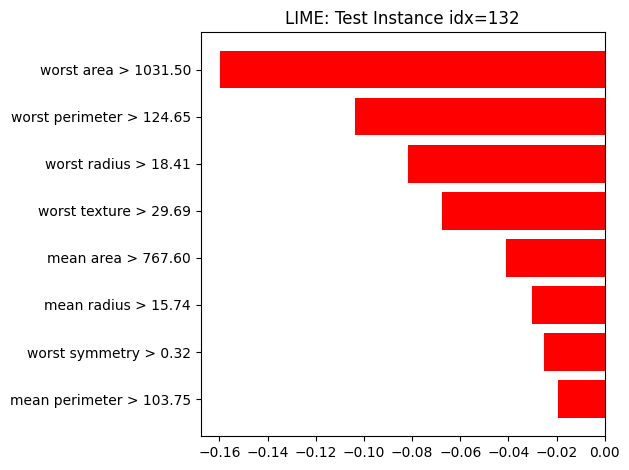

/Users/fanxu/xai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


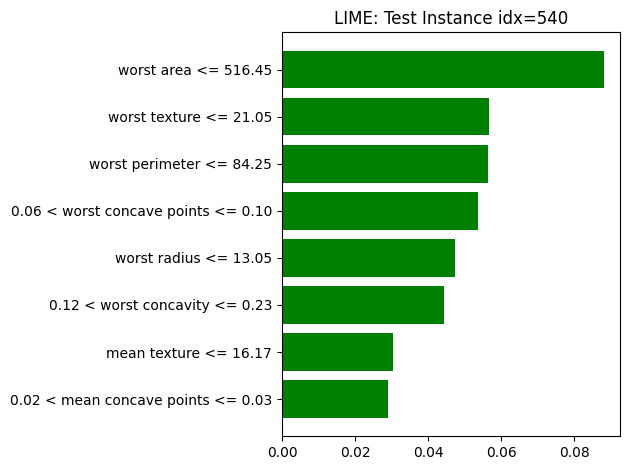

/Users/fanxu/xai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


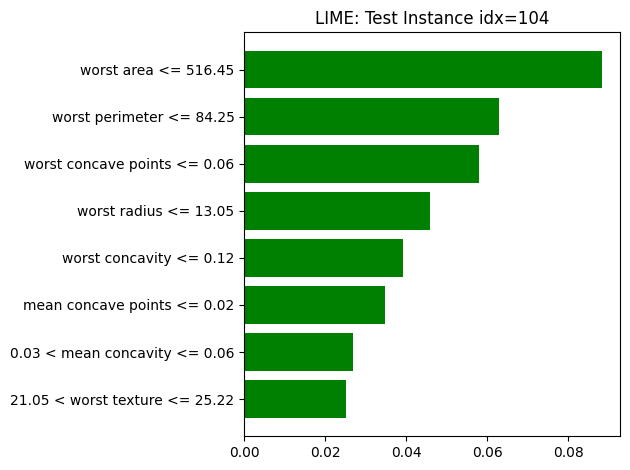

In [ ]:
# LIME explanations


feature_names = list(X.columns)
class_names_list = ["Malignant", "Benign"]

explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=class_names_list,
    discretize_continuous=True,
    mode="classification",
    verbose=False,
    random_state=42,
)

# Explain focus instance
exp_focus = explainer_lime.explain_instance(
    data_row=np.array(focus_instance_bc.iloc[0]),
    predict_fn=model_bc.predict_proba,
    num_features=8,
)
fig = exp_focus.as_pyplot_figure()
plt.title("LIME Explanation: Focus Instance")
plt.tight_layout()
plt.show()

# Explain a few test instances
for idx in y_test.sample(3, random_state=42).index:
    exp = explainer_lime.explain_instance(
        data_row=np.array(X.loc[idx]),
        predict_fn=model_bc.predict_proba,
        num_features=8,
    )
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME: Test Instance idx={idx}")
    plt.tight_layout()
    plt.show()